Name: Dhruvi Shah

Student ID : 202211032

IT 585 AML Assigment 3 (SVM and SVD)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

**Q) Load the Iris dataset from sklearn. Create a scatter plot of the dataset.**


In [17]:
import seaborn as sns
df_iris = sns.load_dataset('iris')

In [18]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

In [19]:
#df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [20]:
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

In [21]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
def plot_iris(df, feature1, feature2):
  plt.figure(figsize=(15,7))
  sns.set_style("darkgrid")
  sns.FacetGrid(df, hue="species", height=8).map(plt.scatter,feature1, feature2).add_legend()
  plt.show()

<Figure size 1080x504 with 0 Axes>

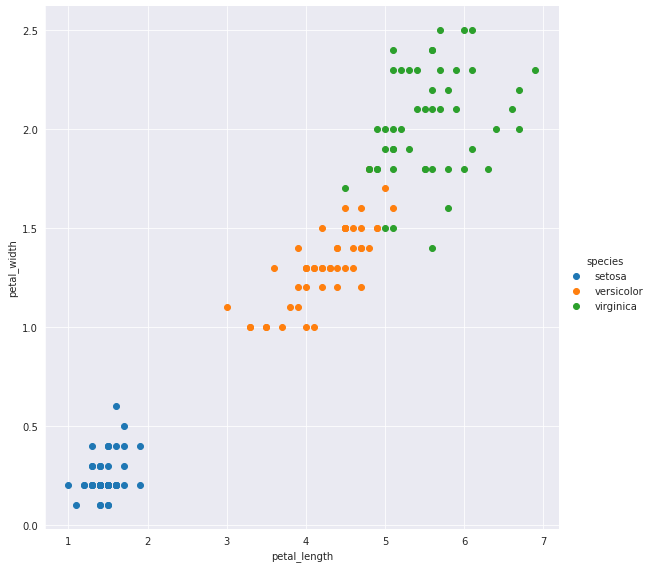

In [23]:
plot_iris(df_iris, 'petal_length', 'petal_width')

<Figure size 1080x504 with 0 Axes>

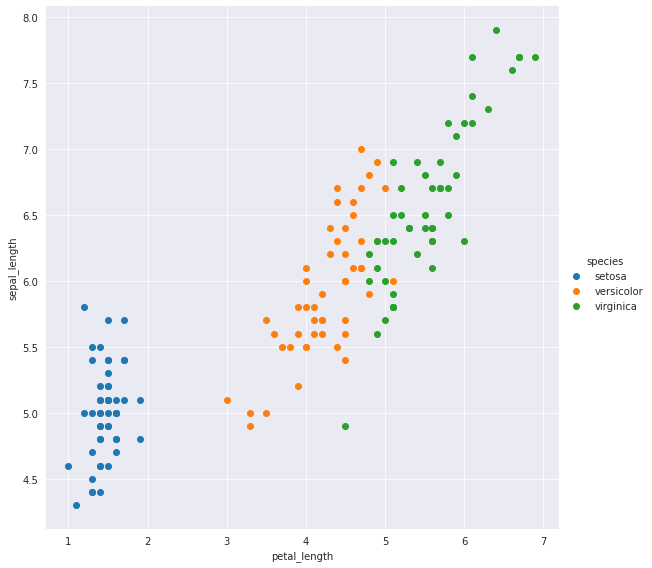

In [24]:
plot_iris(df_iris, 'petal_length', 'sepal_length')

<Figure size 1080x504 with 0 Axes>

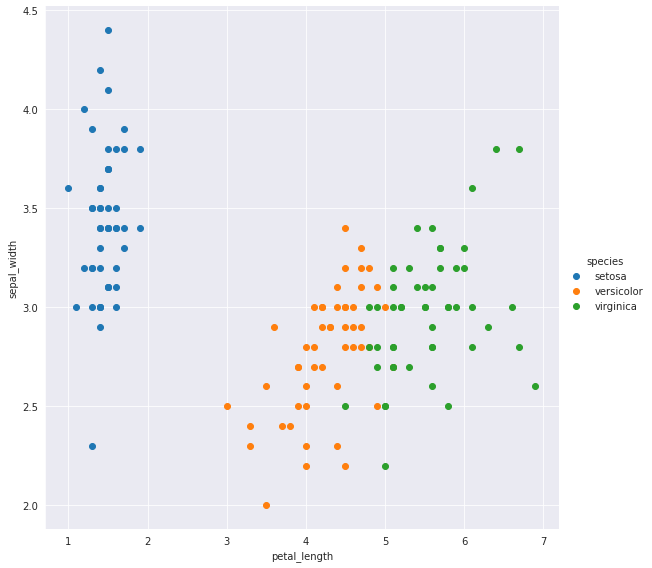

In [10]:
plot_iris(df_iris, 'petal_length', 'sepal_width')

<Figure size 1080x504 with 0 Axes>

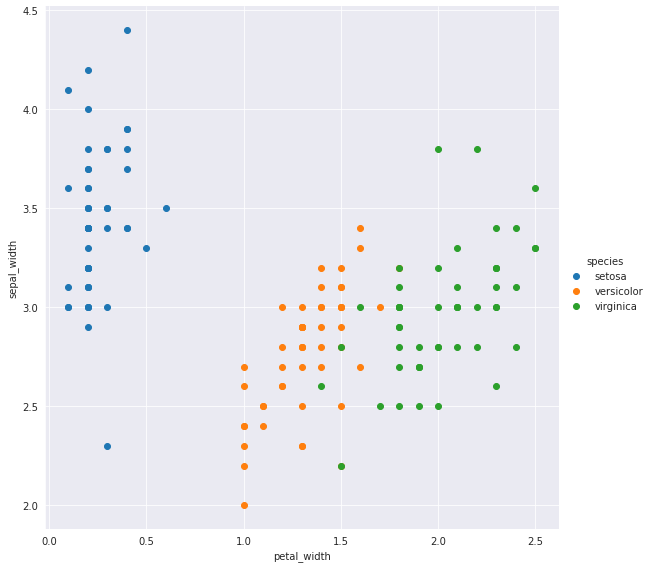

In [11]:
plot_iris(df_iris, 'petal_width', 'sepal_width')

<Figure size 1080x504 with 0 Axes>

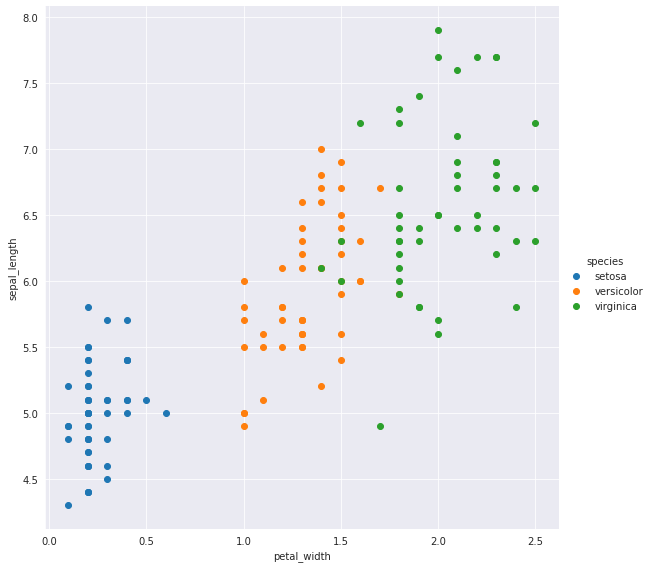

In [12]:
plot_iris(df_iris, 'petal_width', 'sepal_length')

<Figure size 1080x504 with 0 Axes>

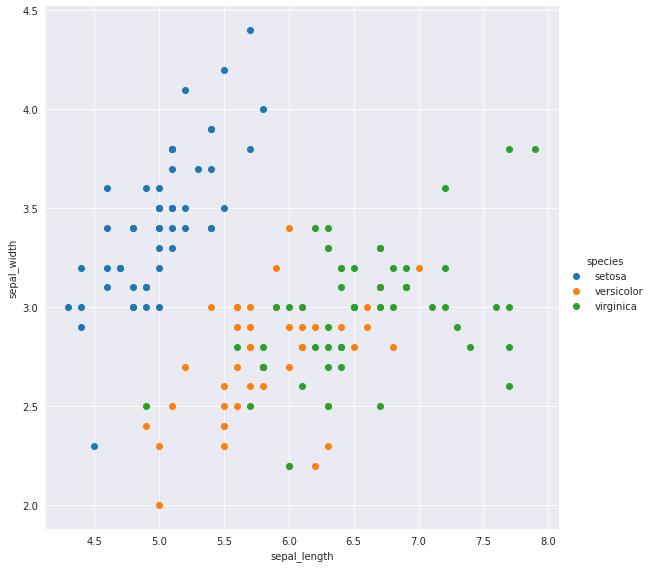

In [13]:
plot_iris(df_iris, 'sepal_length', 'sepal_width')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_new=scaler.transform(x_train)
x_test_new=scaler.transform(x_test)

In [29]:
x_train.shape

(120, 4)

In [30]:
x_test.shape

(30, 4)

In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

**Q) Using your favorite library, train an SVM classifier to predict the class of a given datapoint. Report the accuracy, precision, recall and f1-score.**

In [32]:
pred = svm.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
svm.score(x_test,y_test)

0.9666666666666667

Accuracy is 97% and f1 score precision and recall are as shown in the above table

In [23]:
X_new1 = iris.data[:, :2]  # we only take the first two features.
y_new1 = iris.target

In [45]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


**Q) Modify the parameters of the SVM to get a soft-margin as well as a hard-margin classifier. Compare the performances of the two. Tune the respective 
hyperparameters to get the best results on the validation set. Which parameter effects the hardness of the classifier?**


## Hard Margin SVM

In [37]:
# Train a hard-margin SVM classifier on the training data
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(x_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [39]:
# Use the trained hard-margin classifier to predict the classes of the test set
svm_y_pred = svm_hard.predict(x_test)

In [40]:
# Compute the evaluation metrics for the hard-margin classifier
hard_svm_accuracy = accuracy_score(y_test, svm_y_pred)
hard_svm_precision = precision_score(y_test,svm_y_pred, average='weighted')
hard_svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
hard_svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

In [41]:
# Print the evaluation metrics Hard Margin SVM 
print("For SVM hard margin")
print(f"Accuracy: {hard_svm_accuracy:.3f}")
print(f"Precision: {hard_svm_precision:.3f}")
print(f"Recall: {hard_svm_recall:.3f}")
print(f"F1-score: {hard_svm_f1:.3f}")

For SVM hard margin
Accuracy: 0.967
Precision: 0.970
Recall: 0.967
F1-score: 0.966


#Soft margin SVM

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [57]:
svmSoft= SVC(kernel='linear', C=0.1)
svmSoft.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [58]:
# Use the trained soft-margin classifier to predict the classes of the test set
soft_svmpred = svmSoft.predict(X_test)

# Compute the evaluation metrics for the soft-margin classifier
soft_svm_accuracy = accuracy_score(y_test, soft_svmpred)
soft_svm_precision = precision_score(y_test, soft_svmpred, average='weighted')
soft_svm_recall = recall_score(y_test, soft_svmpred, average='weighted')
soft_svm_f1 = f1_score(y_test, soft_svmpred, average='weighted')

In [59]:
print(f"Accuracy: {soft_svm_accuracy:.3f}")
print(f"Precision: {soft_svm_precision:.3f}")
print(f"Recall: {soft_svm_recall:.3f}")
print(f"F1-score: {soft_svm_f1:.3f}")

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


**Applying grid search for hyperparameter tuning**

In [53]:
param_grid = {'C': [0.01, 0.1, 1, 10]}
soft_svm_grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=4)
soft_svm_grid.fit(X_train, y_train)
best_soft_svm = soft_svm_grid.best_estimator_

In [54]:
best_soft_svm_y_pred = best_soft_svm.predict(X_test)

In [55]:
# Compute the evaluation metrics for the tuned soft-margin classifier
best_soft_svm_accuracy = accuracy_score(y_test, best_soft_svm_y_pred)
best_soft_svm_precision = precision_score(y_test, best_soft_svm_y_pred, average='weighted')
best_soft_svm_recall = recall_score(y_test, best_soft_svm_y_pred, average='weighted')
best_soft_svm_f1 = f1_score(y_test, best_soft_svm_y_pred, average='weighted')

# Print the evaluation metrics for the tuned soft-margin classifier
print("After hyperparameter tuning")
print(f"Accuracy: {best_soft_svm_accuracy:.3f}")
print(f"Precision: {best_soft_svm_precision:.3f}")
print(f"Recall: {best_soft_svm_recall:.3f}")
print(f"F1-score: {best_soft_svm_f1:.3f}")


After hyperparameter tuning
Accuracy: 0.967
Precision: 0.969
Recall: 0.967
F1-score: 0.966


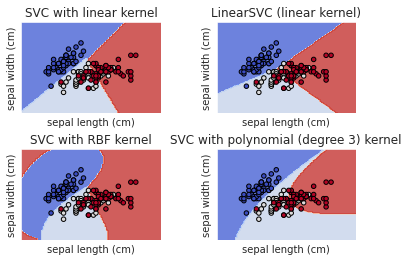

In [26]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

To find the best parameters applying grid search for different values of C and different kernels

**Q) Apply the Gaussian, RBF and polynomial kernels to better classifier(hard-margin or soft-margin). Which kernel gives the best performance? You may need to tune the parameters of the kernels to get the best result for each.** 

## Gaussian, RBF and polynomial kernels

Applying hyperparameter tuning

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each kernel type
rbf_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale', 'auto'], 'kernel': ['rbf']}
poly_param_grid = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5], 'kernel': ['poly']}

# Define the SVM classifiers with different kernel types and their respective parameter grids
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly')

# Perform a grid search with cross-validation on the validation set for each kernel type
rbf_grid_search = GridSearchCV(rbf_svm, param_grid=rbf_param_grid, cv=5)
poly_grid_search = GridSearchCV(poly_svm, param_grid=poly_param_grid, cv=5)

rbf_grid_search.fit(X_train, y_train)
poly_grid_search.fit(X_train, y_train)

# Get the best SVM classifiers and their hyperparameters for each kernel type
best_rbf_svm = rbf_grid_search.best_estimator_
best_poly_svm = poly_grid_search.best_estimator_
rbf_params = rbf_grid_search.best_params_
poly_params = poly_grid_search.best_params_

# Evaluate the performance of the best SVM classifiers on the test set
rbf_y_pred = best_rbf_svm.predict(X_test)
poly_y_pred = best_poly_svm.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_y_pred)
poly_accuracy = accuracy_score(y_test, poly_y_pred)

print(f"The best svm rbf classifier accuracy : {rbf_accuracy:.3f}")
print(f"The best hyperparameter of RBF SVM classfier: {rbf_params}")
print(f"The best polynomial kernel SVM classifier accuracy : {poly_accuracy:.3f}")
print(f"The best hyperparameter of polynomial SVM classfie: {poly_params}")


The best svm rbf classifier accuracy : 1.000
The best hyperparameter of RBF SVM classfier: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The best polynomial kernel SVM classifier accuracy : 1.000
The best hyperparameter of polynomial SVM classfie: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}


It can be seen from above that for RBF kerenel best accuracy is 100% and C=10 and for polynomial kernel C=0.1 with degree 4 is the best

# 2) SVD

Q) Load the following images from skimage 
Since an image is basically a matrix, we can compute the SVD of the matrix. 

● Plot any one of these images using matplotlib and extract the data matrix for this image. 

● Compute the SVD of the matrix, and compute a rank-k approximation of the image, where k is user-defined. This will be the reconstructed image

● For different values of k, plot the original image as well as the reconstructed image.


In [3]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual

In [4]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
    "cat":rgb2gray(img_as_float(img_as_float(data.chelsea()))),
    "astro":rgb2gray(img_as_float(img_as_float(data.astronaut()))),
    "camera":data.camera(),
    "coin":data.coins(),
    "clock":data.clock(),
    "blobs":data.binary_blobs(),
    "coffee":rgb2gray(img_as_float(data.coffee()))
}

**Plot any one of these images using matplotlib and extract the data matrix for this image.**

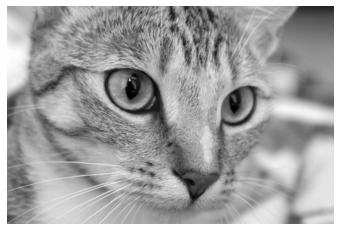

In [5]:
import matplotlib.pyplot as plt

# Get the "cat" image from the dictionary
image = gray_images["cat"]

# Plot the image using matplotlib
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

# Extract the data matrix for the image
data_matrix = image.copy()


 **Q) Compute the SVD of the matrix, and compute a rank-k approximation of the image, where k is user-defined. This will be the reconstructed image**

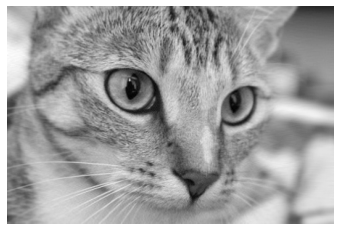

In [14]:
import numpy as np

# Compute the SVD of the data matrix
U, S, Vt = np.linalg.svd(data_matrix, full_matrices=False)

# User-defined rank-k approximation
k = 100

# Reconstruct the image using the rank-k approximation
reconstructed_matrix = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
reconstructed_image = np.clip(reconstructed_matrix, 0, 1)

# Plot the reconstructed image using matplotlib
plt.imshow(reconstructed_image, cmap="gray")
plt.axis("off")
plt.show()


**Q) For different values of k, plot the original image as well as the reconstructed image. How does the quality vary with k?**

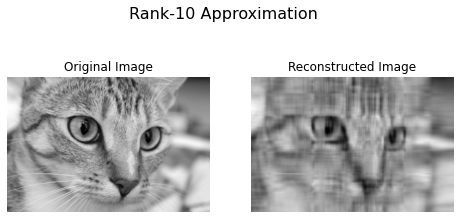

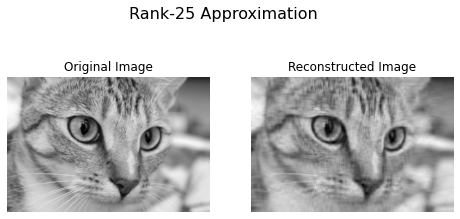

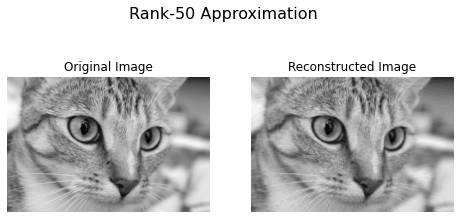

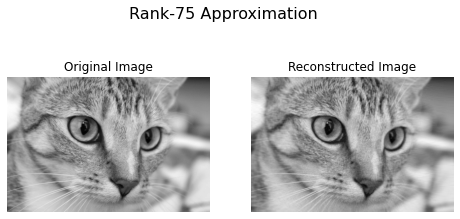

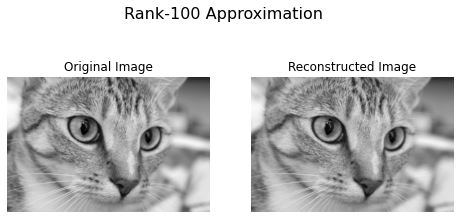

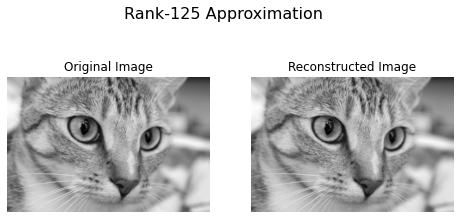

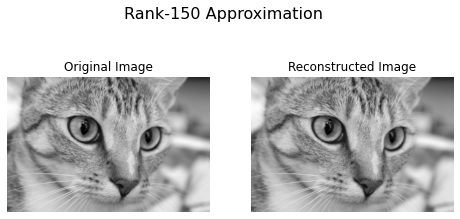

In [15]:
# Set a list of k values to try
k_values = [10,25,50,75,100,125,150]

# Plot the original image and reconstructed image for each k value
for k in k_values:
    # Reconstruct the image using the rank-k approximation
    reconstructed_matrix = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    reconstructed_image = np.clip(reconstructed_matrix, 0, 1)
    
    # Plot the original and reconstructed images side by side
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f"Rank-{k} Approximation", fontsize=16)
    ax[0].imshow(data_matrix, cmap="gray")
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    ax[1].imshow(reconstructed_image, cmap="gray")
    ax[1].set_title("Reconstructed Image")
    ax[1].axis("off")
    plt.show()


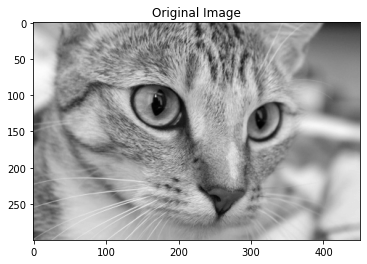

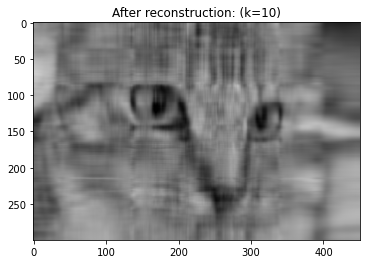

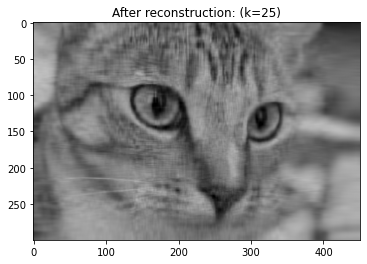

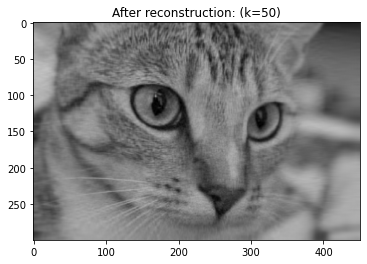

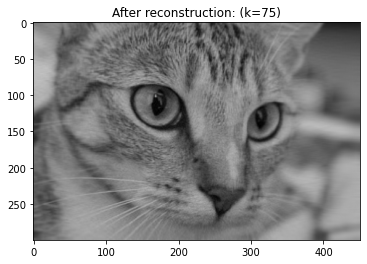

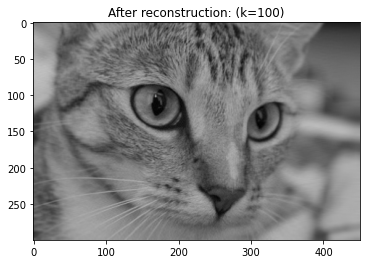

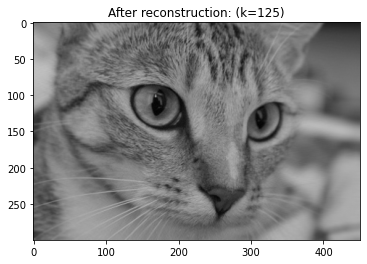

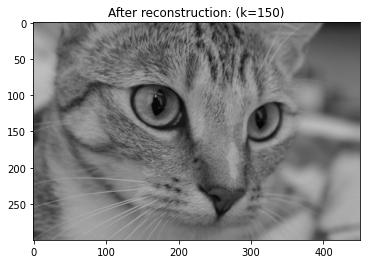

In [9]:
#converting cat image to grayscale
from skimage import data, color
import numpy as np
import matplotlib.pyplot as plt

image = color.rgb2gray(data.chelsea())

plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.show()

image_matrix = np.array(image)

#trying different k values
k_values = [10,25,50,75,100,125,150]

#plotting reconstructed images
for k in k_values:
    # for rank k approximation
    U, S, Vt = np.linalg.svd(image_matrix, full_matrices=False)
    reconstructed_matrix = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    reconstructed_image = color.gray2rgb(reconstructed_matrix)
    
    plt.imshow(reconstructed_image)
    plt.title(f"After reconstruction: (k={k})")
    plt.show()


In [10]:
image = data.chelsea()
image.shape

(300, 451, 3)

In [11]:
from scipy import linalg                                                                            
from scipy.sparse import linalg as slinalg      
from scipy.sparse.linalg import svds

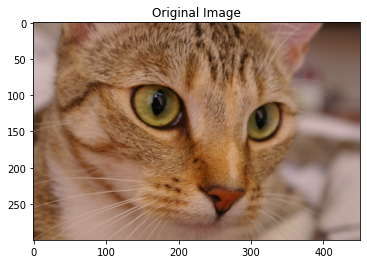

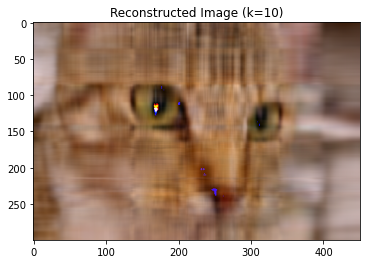

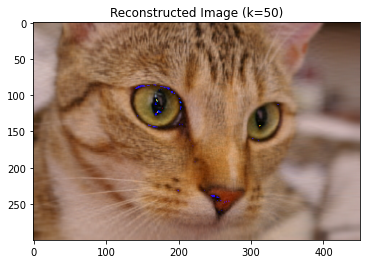

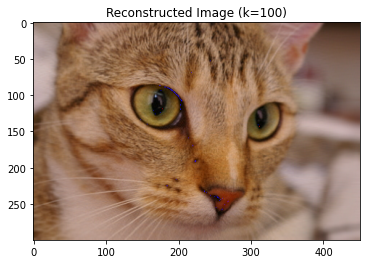

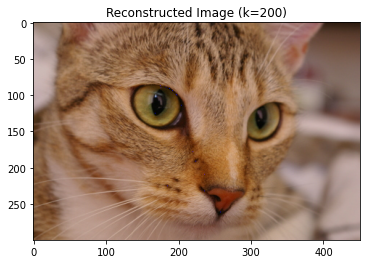

In [12]:
#Experimenting for coloured cat image
from skimage import data, color
import numpy as np
import matplotlib.pyplot as plt

# Converting to grayscale
image = data.chelsea()

plt.imshow(image)
plt.title("Original Image")
plt.show()

image = image/255
image_matrix = image.reshape(300,1353)

# Various k values
k_values = [10,25,50,75,100,125,150]

# Plotting reconstruceted images for each k values
for k in k_values:
    # rank-k approximation
    U, S, Vt = svds(image_matrix, k = k)
    reconstructed_matrix = U[:, :] @ np.diag(S[:]) @ Vt[:, :]
    reconstructed_image = np.reshape(reconstructed_matrix, (image.shape[0], image.shape[1], 3))

    plt.imshow( (reconstructed_image * 255).astype(np.uint8) )
    plt.title(f"Reconstructed Image (k={k})")
    plt.show()


**Q) How does the quality vary with k? **

**Effect of different values of K:**
k value determines the level of compression hence defines the quality of the image.As k increases, the image quality improves, and the compressed image becomes more similar to the original image. However, as k continues to increase, the difference between the compressed and original images becomes smaller, and the additional singular values do not contribute much to the reconstruction of the image.Hence, there is a trade-off between image quality and compression level when selecting the value of k. A smaller value of k will result in a more compressed image with a lower quality, while a larger value of k upto some level will result in a less compressed image with a higher quality.